# sequana_coverage test case example (Bacteria Staphylococcus aureus)

This notebook illustrates the impact of the window parameter on 
the results.

Here, we can download a BED file generated for you corresponding to:

In [9]:
! wget https://github.com/sequana/resources/raw/master/coverage/FN433596.bed.bz2 1>out 2>err
! bunzip2 FN433596.bed.bz2 1>out 2>err

If you want to reproduce this BED file, please see the **bacteria** notebook.

In [3]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [10,7]

Populating the interactive namespace from numpy and matplotlib


# Download reference and genbank (optional)

In [5]:
! sequana_coverage --download-reference FN433596
! sequana_coverage --download-genbank FN433596

INFO    [sequana]:  Downloading reference FN433596 from ENA

INFO    [sequana]:  Downloading genbank FN433596 from ENA



# Sequana coverage (library)

Here we will execute the coverage code to search for ROIs but looking at the impact of the window size parameter. Instead of using the standalone code we will the library to be able to loop through the window parameter. 


In [16]:
from sequana import GenomeCov, logger
logger.level = "ERROR"
# load the BED and genbank file
b = GenomeCov("FN433596.bed", "FN433596.gbk")
b.compute_gc_content("FN433596.fa")

In [17]:
# load the first chromosome and compute running median and get z-scores
chromosome = b.chr_list[0]
chromosome.thresholds.low = -4
chromosome.thresholds.high = 4
chromosome.run(20001, circular=True)

In [18]:
rois = chromosome.get_rois()
rois.df

,chr,start,end,size,mean_cov,max_cov,mean_rm,mean_zscore,max_zscore,log2_ratio
0,ENA|FN433596|FN433596.1,1,19,18,311.666667,367,521.000000,-5.500030,-7.142028,-0.741280
1,ENA|FN433596|FN433596.1,5375,5401,26,354.846154,365,521.000000,-4.368637,-4.941052,-0.554090
2,ENA|FN433596|FN433596.1,6202,6239,37,322.108108,368,520.000000,-5.210212,-6.210645,-0.690967
3,ENA|FN433596|FN433596.1,10419,10442,23,333.913043,363,520.000000,-4.900303,-6.000625,-0.639039
4,ENA|FN433596|FN433596.1,24149,24251,102,356.833333,400,518.000000,-4.262420,-5.470304,-0.537702
5,ENA|FN433596|FN433596.1,26042,26046,4,357.000000,365,523.000000,-4.347973,-4.504585,-0.550887
6,ENA|FN433596|FN433596.1,31011,31070,59,356.169492,373,524.000000,-4.387393,-4.834694,-0.557003
7,ENA|FN433596|FN433596.1,36531,36532,1,67.000000,67,521.000000,-11.910810,-11.910810,-2.959050
8,ENA|FN433596|FN433596.1,48293,48373,80,755.087500,841,508.425000,6.608366,8.933525,0.570609
9,ENA|FN433596|FN433596.1,50916,50954,38,301.157895,351,504.000000,-5.509219,-6.515674,-0.742904


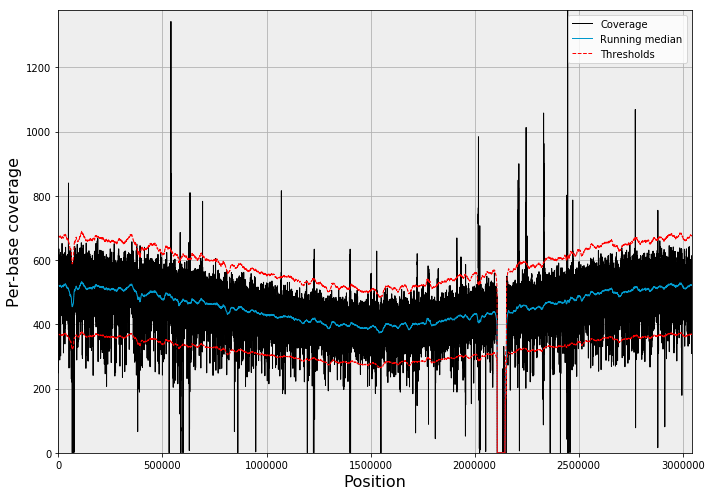

In [14]:
# 
chromosome.plot_coverage()

The following code is a function that does the analysis shown above (running median, zscore computation, identification of the ROI, and some plotting). The function then returns the ROIs. It allows to focus on a specific genome range and emphasize the ROIs that have been detected.

One of the parameter is the window parameter of the running median step, which is investigated in this notebook.

In [2]:
def identify_rois_and_plot_variant( x1=526000, x2=538000, W=20001):
    clf()    
    from sequana import GenomeCov
    # load the BED and genbank file
    b = GenomeCov("FN433596.bed", "FN433596.gbk")
    b.chr_list[0]._df = b.chr_list[0].df.iloc[x1:x2]
    #b.compute_gc_content("FN433596.fasta")
    chromosome = b.chr_list[0]
    chromosome.run(W, circular=True)
    chromosome.plot_coverage()
        
    roi = chromosome.get_rois()
    low = roi.get_low_rois()
    high = roi.get_high_rois()
    
    chr = chromosome
    highT = (chr.thresholds.high * chr.best_gaussian["sigma"] +
         chr.best_gaussian["mu"]) * chr.df["rm"]
    lowT = (chr.thresholds.low * chr.best_gaussian["sigma"] +
        chr.best_gaussian["mu"]) * chr.df["rm"]

    if len(low):
        for k,v in low.iterrows():        
            Y1 = chr.df['cov'].loc[v.start:v.end]
            Y2 = lowT.loc[v.start:v.end] 
            Y1 = Y1.combine(Y2, max) *0
            if v.start > x1 and v.end<x2:
                try:fill_between(range(v.start, v.end+1), Y1, Y2, alpha=0.6, color="blue")
                except:pass
    
    if len(high):
        for k,v in high.iterrows():
            Y1 = highT.loc[v.start:v.end]
            Y2 = chr.df['cov'].loc[v.start:v.end]
            Y2 = Y2.combine(Y1,max)
            if v.start > x1 and v.end<x2:
                try:fill_between(range(v.start, v.end+1), y1=Y1,y2=Y2 ,alpha=0.6, color="orange")
                except:pass

    xlim([x1,x2])

    return roi

First, let us use a small window size of only 2000 bases. 
If we focus on the area where there is a deleted regions, we see that the thresholds (implied by the running median) are affected by the deleted 
regions. This means that even the running median did not ignore the deleted regions. To be ignored, the window parameter should be twice as much as the deleted regions itself 

(0, 800)

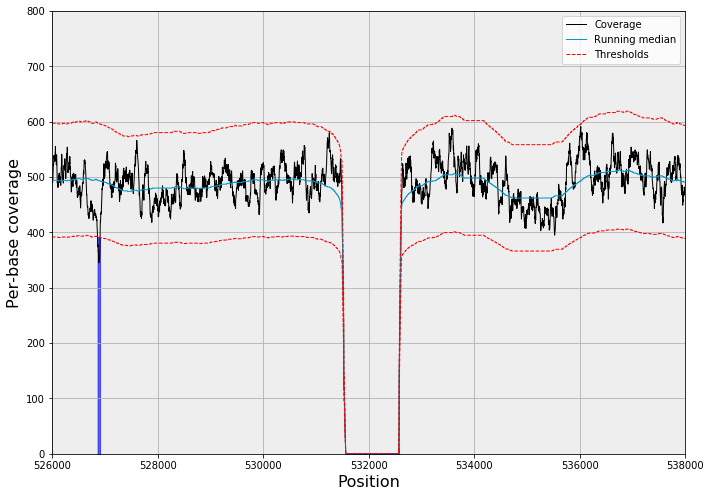

In [8]:
# Here we emphasize the fact that you will miss simple CNV-like event
# if the window parameter is too short. For instance this 1100-long 
# event is missed because the window itself is less than 2 times 1100 bases
roi2000 = identify_rois_and_plot_variant(W=2001, x1=526000, x2=538000)
ylim([0,800])

(0, 800)

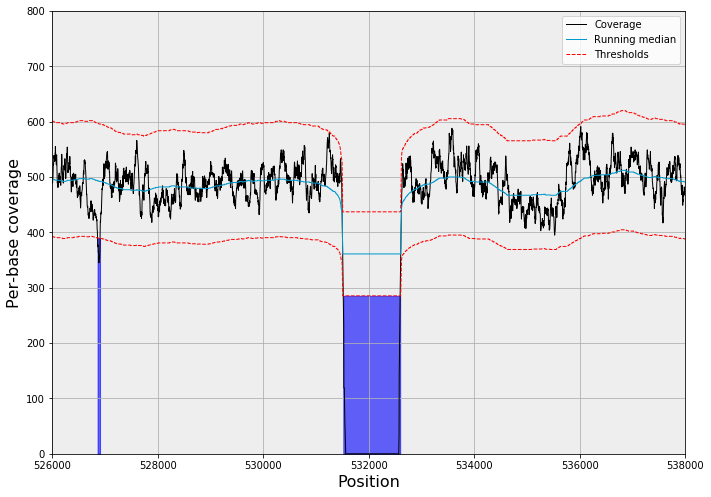

In [9]:
# To detect the 1100-long deleted regions, a window size of 2200 should be enough. 
# even though, slightly larger (e.g. 2300) would give a smoother and therefore less
# biases results

# Moreover, as can be seen in this example, the event detected at position
# around 527,000 is still detected.
roi2200 = identify_rois_and_plot_variant(W=2200, x1=526000, x2=538000)
ylim([0,800])

We have run sequana_coverage to store the ROIs for different window sizes.
There is no gold standard but we can compare the different results and show that
the impact of the window parameter is small. 

In [4]:
import pandas as pd

/home/cokelaer/miniconda3/envs/py3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


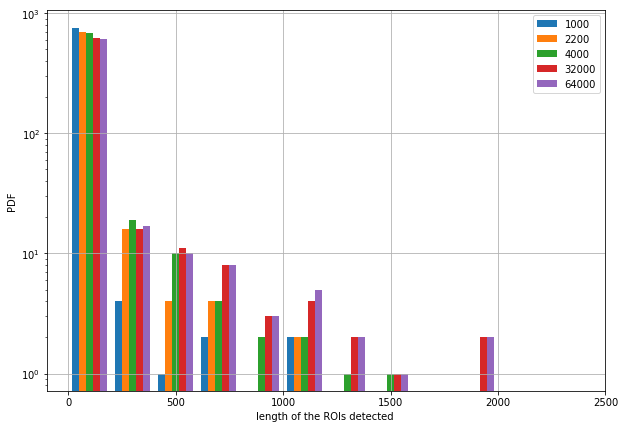

In [11]:
bins = range(0, 2500, 200)
rois1000 = pd.read_csv("rois_1000.csv")
rois2200 = pd.read_csv("rois_2200.csv")
rois4000 = pd.read_csv("rois_4000.csv")
rois32000 = pd.read_csv("rois_32000.csv")
rois64000 = pd.read_csv("rois_64000.csv")


_ = hist([rois1000['size'], rois2200['size'], rois4000['size'], rois32000['size'], rois64000['size']], 
         bins=bins, log=True)
legend(["1000", "2200", "4000", "32000", "64000"])
grid()
_ = xlabel("length of the ROIs detected ")
_ = ylabel("PDF")

In the plot above, we see that short ROIs are detected whatever is the length of the window. 
However, with increasing ROIs length (e.g. 500), the parameter set to 1000 (blue bars) already misses some events.
Conversely the largest windows (32000, 64000) detect all events (short or long)). The large windows do not seem to add
false detections. 

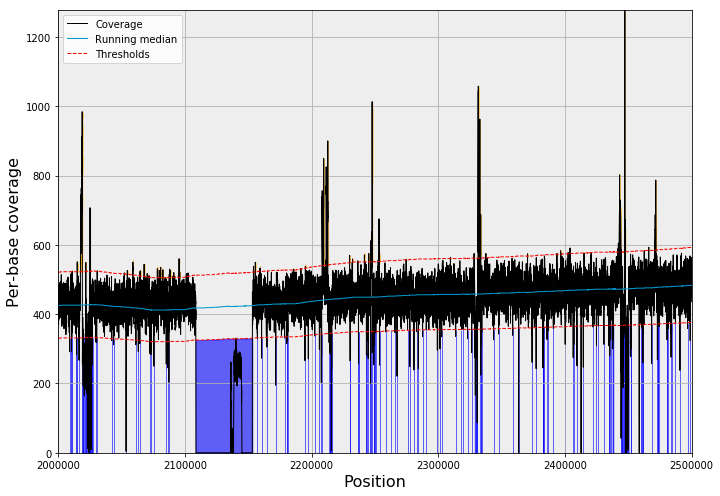

In [14]:
_ = identify_rois_and_plot_variant(x1=2000000, x2=2500000, W=160001)

Impact of using a larger window: You may not follow the trend closely anymore, which may be an isssue with 
coverage signal with lots of fluctuations. 

For instance, here below, we have a few green circles just next to the threshold line (red line), which are detected 
but would not with the larger window.

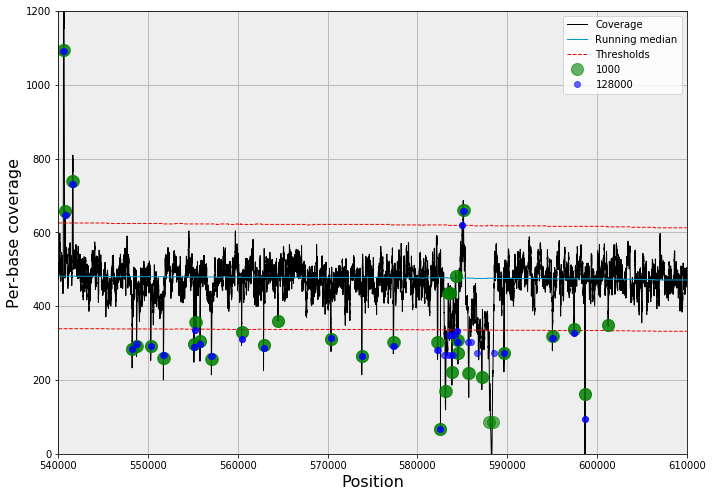

In [21]:
chromosome.run(128000, circular=True)
chromosome.plot_coverage(x1=540000, x2=610000, sample=False)
for i,this in enumerate([1000, 128000]):
    marker = "oo" 
    color = "gb"
    ms=[12,6]
    df = pd.read_csv("rois_{}.csv".format(this))    
    for _, d in df.iterrows():
        plot([d['start'], d['end']], [d["mean_cov"], d["mean_cov"]], marker[i], color=color[i], 
            markersize=ms[i], alpha=0.6, lw=1, label=this)
ylim([0, 1200])
legend()

Same as above but here the running median plot uses a window set to 1000. 
Green and blue dots are the same as above.

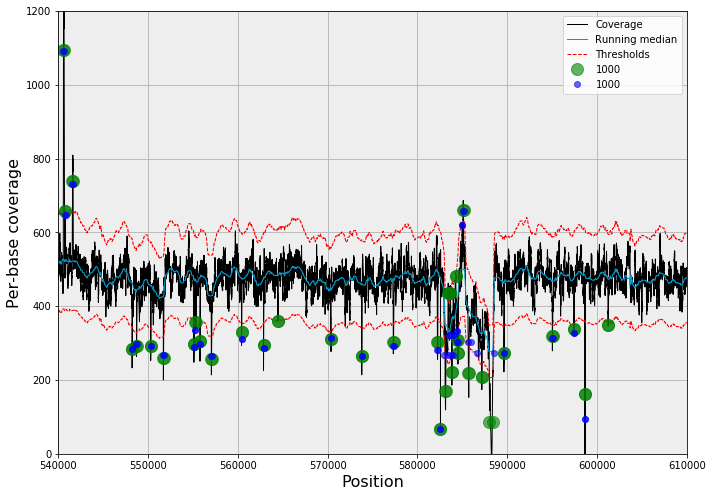

In [23]:
chromosome.run(1000, circular=True)
chromosome.plot_coverage(x1=540000, x2=610000, sample=False)
for i,this in enumerate([1000,128000]):
    marker = "oo" 
    color = "gb"
    ms=[12,6]
    df = pd.read_csv("rois_{}.csv".format(this))    
    for _, d in df.iterrows():
        plot([d['start'], d['end']], [d["mean_cov"], d["mean_cov"]], marker[i], color=color[i], 
            markersize=ms[i], alpha=0.6, lw=1, label=1000)
ylim([0,1200])
legend()

Using the previous code, you can simply compare two sets of ROIs available in the directory



In [24]:
import glob
glob.glob("rois*csv")

['rois_64000.csv',
 'rois_72000.csv',
 'rois_1000.csv',
 'rois_20000.csv',
 'rois_232000.csv',
 'rois_104000.csv',
 'rois_48000.csv',
 'rois_128000.csv',
 'rois_24000.csv',
 'rois_256000.csv',
 'rois_32000.csv',
 'rois_2200.csv',
 'rois_4000.csv',
 'rois_16000.csv',
 'rois_8000.csv',
 'rois_176000.csv']

# Criteria to select the window size of 20,000

There seem to be a false alarm increase for low window size (zscore remains small).
For instance, if we plot the number of ROIs for window size from 1000 to 256,000 as show below, there seem to be a plateau after 20,000 where the number of events converges to about 650. 

Choosing 20,000 (in this case) seems to be a good choice since it reducs the false alarm. Larger window, would be useful only to detect deleted or duplicated regions.

drawbacks of large windows: 
- time computation may be a bit slower
- you may miss fluctuations.

Text(0,0.5,'Number of detected ROIs')

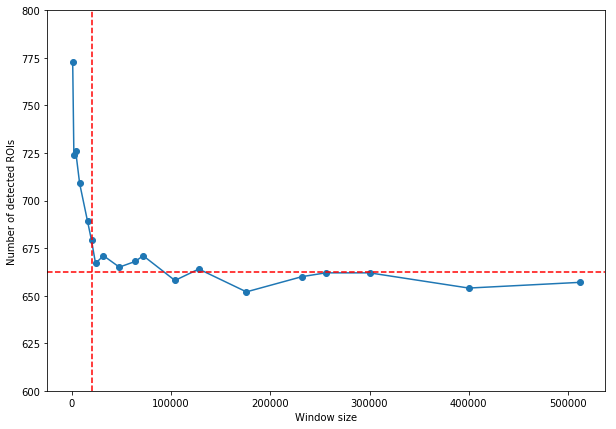

In [6]:
L = []
vals = [1000,2200,4000,8000,16000,20000,24000, 32000,48000, 64000,72000,
        104000, 128000,176000, 232000, 256000, 300000,400000,512000]
for this in vals:
    df = pd.read_csv("rois_{}.csv".format(this))
    L.append(len(df))
plot(vals, L, "o-")
ylim([600,800])
M = mean( [l for l,v in zip(L, vals) if v>20000])
axhline(M, color="r", ls="--")
axvline(20000, color="r", ls="--")
xlabel("Window size")
ylabel("Number of detected ROIs")
